# ML Climate Final Project
# Aditya Kulkarni
## 10/16/22


Please note: From the pipeline below, every single country can be predicted using four of the forecasting models below. At the moment, only few of them are generated to keep size of file at a minimum.



---



# Imports

In [1]:
!pip install neuralprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install pyaf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from neuralprophet import NeuralProphet
import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import math
import pyaf.ForecastEngine as autof

- Dataset Link: https://stats.oecd.org/Index.aspx?DataSetCode=air_ghg
 

# Data Collection

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data was generated from https://stats.oecd.org.

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ml_and_climate_project_data.csv")

In [6]:
df.describe

<bound method NDFrame.describe of        COU    Country  POL         Pollutant           VAR  \
0      AUS  Australia  GHG  Greenhouse gases         TOTAL   
1      AUS  Australia  GHG  Greenhouse gases         TOTAL   
2      AUS  Australia  GHG  Greenhouse gases         TOTAL   
3      AUS  Australia  GHG  Greenhouse gases         TOTAL   
4      AUS  Australia  GHG  Greenhouse gases         TOTAL   
...    ...        ...  ...               ...           ...   
75686  PER       Peru  GHG  Greenhouse gases  GHG_GDP_LULU   
75687  PER       Peru  GHG  Greenhouse gases  GHG_GDP_LULU   
75688  PER       Peru  GHG  Greenhouse gases  GHG_GDP_LULU   
75689  PER       Peru  GHG  Greenhouse gases  GHG_GDP_LULU   
75690  PER       Peru  GHG  Greenhouse gases  GHG_GDP_LULU   

                                     Variable   YEA  Year   Unit Code  \
0           Total  emissions excluding LULUCF  1990  1990  T_CO2_EQVT   
1           Total  emissions excluding LULUCF  1991  1991  T_CO2_EQVT   
2 

In [7]:
df.VAR.unique()

array(['TOTAL', 'INDEX_1990', 'GHG_CAP', 'WAS', 'IND_PROC', 'ENER', 'AGR',
       'OTH', 'GHG_GDP', 'ENER_IND', 'LULUCF', 'ENER_OSECT', 'ENER_OTH',
       'ENER_FU', 'ENER_MANUF', 'ENER_TRANS', 'INDEX_2000', 'TOTAL_LULU',
       'ENER_CO2', 'ENER_IND_P', 'ENER_OTH_P', 'AGR_P', 'ENER_P',
       'ENER_MANUF_P', 'ENER_OSECT_P', 'WAS_P', 'IND_PROC_P',
       'ENER_TRANS_P', 'ENER_FU_P', 'OTH_P', 'ENER_CO2_P', 'GHG_GDP_LULU',
       'GHG_CAP_LULU'], dtype=object)

Checking Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75691 entries, 0 to 75690
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COU                    75691 non-null  object 
 1   Country                75691 non-null  object 
 2   POL                    75691 non-null  object 
 3   Pollutant              75691 non-null  object 
 4   VAR                    75691 non-null  object 
 5   Variable               75691 non-null  object 
 6   YEA                    75691 non-null  int64  
 7   Year                   75691 non-null  int64  
 8   Unit Code              72758 non-null  object 
 9   Unit                   72758 non-null  object 
 10  PowerCode Code         75691 non-null  int64  
 11  PowerCode              75691 non-null  object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  75691 non-null  float64
 15  Fl

In [9]:
df.head(2)

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425624.307,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425686.445,NaN,NaN


In [10]:
len(df)

75691

In [11]:
df

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425624.307,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425686.445,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,429473.085,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430381.731,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430848.498,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75686,PER,Peru,GHG,Greenhouse gases,GHG_GDP_LULU,Total GHG incl. LULUCF per unit of GDP,2005,2005,NaN,NaN,0,Units,NaN,NaN,0.773,NaN,NaN
75687,PER,Peru,GHG,Greenhouse gases,GHG_GDP_LULU,Total GHG incl. LULUCF per unit of GDP,2010,2010,NaN,NaN,0,Units,NaN,NaN,0.612,NaN,NaN
75688,PER,Peru,GHG,Greenhouse gases,GHG_GDP_LULU,Total GHG incl. LULUCF per unit of GDP,2012,2012,NaN,NaN,0,Units,NaN,NaN,0.565,NaN,NaN
75689,PER,Peru,GHG,Greenhouse gases,GHG_GDP_LULU,Total GHG incl. LULUCF per unit of GDP,2014,2014,NaN,NaN,0,Units,NaN,NaN,0.579,NaN,NaN


In [12]:
df.Variable.unique()

array(['Total  emissions excluding LULUCF',
       'Total GHG excl. LULUCF, Index 1990=100',
       'Total GHG excl. LULUCF per capita', '5 - Waste',
       '2- Industrial processes and product use', '1 - Energy',
       '3 - Agriculture', '6 - Other',
       'Total GHG excl. LULUCF per unit of GDP',
       '1A1 - Energy Industries',
       'Land use, land-use change and forestry (LULUCF)',
       '1A4 - Residential and other sectors', '1A5 - Energy - Other',
       '1B - Fugitive Emissions from Fuels',
       '1A2 - Manufacturing industries and construction',
       '1A3 - Transport', 'Total GHG excl. LULUCF, Index 2000=100',
       'Total  emissions including LULUCF',
       '1C - CO2 from Transport and Storage',
       '1A4 - Residential and other sectors\t',
       'Total GHG incl. LULUCF per unit of GDP',
       'Total GHG incl. LULUCF per capita'], dtype=object)

In [13]:
df.VAR.unique()

array(['TOTAL', 'INDEX_1990', 'GHG_CAP', 'WAS', 'IND_PROC', 'ENER', 'AGR',
       'OTH', 'GHG_GDP', 'ENER_IND', 'LULUCF', 'ENER_OSECT', 'ENER_OTH',
       'ENER_FU', 'ENER_MANUF', 'ENER_TRANS', 'INDEX_2000', 'TOTAL_LULU',
       'ENER_CO2', 'ENER_IND_P', 'ENER_OTH_P', 'AGR_P', 'ENER_P',
       'ENER_MANUF_P', 'ENER_OSECT_P', 'WAS_P', 'IND_PROC_P',
       'ENER_TRANS_P', 'ENER_FU_P', 'OTH_P', 'ENER_CO2_P', 'GHG_GDP_LULU',
       'GHG_CAP_LULU'], dtype=object)

We only care about the emissions from the residential area 

In [14]:
df = df.loc[df["Variable"] == '1A4 - Residential and other sectors']

In [15]:
df.head(2)

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
15549,NLD,Netherlands,GHG,Greenhouse gases,ENER_OSECT,1A4 - Residential and other sectors,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,39535.126,NaN,NaN
15550,NLD,Netherlands,GHG,Greenhouse gases,ENER_OSECT,1A4 - Residential and other sectors,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,44778.666,NaN,NaN


In [16]:
df = df.drop(["Reference Period Code", "Reference Period", "Flag Codes", "Flags"],  axis=1)

In [17]:
df[-4:]

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
74297,EU27_2020,European Union – 27 countries (from 01/02/2020),GHG,Greenhouse gases,ENER_OSECT,1A4 - Residential and other sectors,2017,2017,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,545720.67
74298,EU27_2020,European Union – 27 countries (from 01/02/2020),GHG,Greenhouse gases,ENER_OSECT,1A4 - Residential and other sectors,2018,2018,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,531003.87
74299,EU27_2020,European Union – 27 countries (from 01/02/2020),GHG,Greenhouse gases,ENER_OSECT,1A4 - Residential and other sectors,2019,2019,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,520334.19
74300,EU27_2020,European Union – 27 countries (from 01/02/2020),GHG,Greenhouse gases,ENER_OSECT,1A4 - Residential and other sectors,2020,2020,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,512934.02


In [18]:
df.iloc[[2]]

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
15551,NLD,Netherlands,GHG,Greenhouse gases,ENER_OSECT,1A4 - Residential and other sectors,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,41897.131


Only need Country, Year, and Value as everything else is the same or redundant

In [19]:
finaldf = df[["Country", "Year", "Value"]]

In [20]:
finaldf

,Country,Year,Value
15549,Netherlands,1990,39535.126
15550,Netherlands,1991,44778.666
15551,Netherlands,1992,41897.131
15552,Netherlands,1993,44187.192
15553,Netherlands,1994,41552.684
...,...,...,...
74296,European Union – 27 countries (from 01/02/2020),2016,550028.390
74297,European Union – 27 countries (from 01/02/2020),2017,545720.670
74298,European Union – 27 countries (from 01/02/2020),2018,531003.870
74299,European Union – 27 countries (from 01/02/2020),2019,520334.190


Interpolating Data to ensure no N/A values

In [21]:
finaldf['Value'] = finaldf.groupby(['Value']).apply(lambda x: x[['Value']].interpolate())

WARNING - (py.warnings._showwarnmsg) - <ipython-input-21-101ac70c9ba0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['Value'] = finaldf.groupby(['Value']).apply(lambda x: x[['Value']].interpolate())

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['Value'] = finaldf.groupby(['Value']).apply(lambda x: x[['Value']].interpolate())



Convert year column to datetime recognized year


In [22]:
x = pd.to_datetime(finaldf.loc[:,'Year'], format='%Y')

In [23]:
x  

15549   1990-01-01
15550   1991-01-01
15551   1992-01-01
15552   1993-01-01
15553   1994-01-01
           ...    
74296   2016-01-01
74297   2017-01-01
74298   2018-01-01
74299   2019-01-01
74300   2020-01-01
Name: Year, Length: 1542, dtype: datetime64[ns]

In [24]:
columns_to_overwrite =["Year"]

In [25]:
finaldf.drop(labels=columns_to_overwrite, axis='columns', inplace=True)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



In [26]:
finaldf['Year'] = x

WARNING - (py.warnings._showwarnmsg) - <ipython-input-26-9d2a540724b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['Year'] = x

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['Year'] = x



In [27]:
finaldf.head() # Works!

,Country,Value,Year
15549,Netherlands,39535.126,1990-01-01
15550,Netherlands,44778.666,1991-01-01
15551,Netherlands,41897.131,1992-01-01
15552,Netherlands,44187.192,1993-01-01
15553,Netherlands,41552.684,1994-01-01


In [28]:
finaldf.info() # Confirmation- year is now a datatime64[ns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 15549 to 74300
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  1542 non-null   object        
 1   Value    1542 non-null   float64       
 2   Year     1542 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 48.2+ KB


Let us look at which countries emission data we have

In [29]:
finaldf['Country'].unique()

array(['Netherlands', 'Norway', 'United Kingdom', 'Spain', 'Slovenia',
       'Japan', 'Greece', 'Finland', 'New Zealand', 'Lithuania',
       'Denmark', 'Italy', 'Türkiye', 'Hungary', 'Slovak Republic',
       'Czech Republic', 'Ireland', 'Estonia', 'Belgium', 'Russia',
       'Latvia', 'Sweden', 'Canada', 'Portugal', 'Germany', 'Luxembourg',
       'Iceland', 'Australia', 'Austria', 'Poland', 'United States',
       'Switzerland', 'France', 'OECD - Europe',
       "China (People's Republic of)", 'India', 'Indonesia',
       'South Africa', 'OECD - Total', 'OECD Asia Oceania',
       'OECD America', 'Brazil', 'Malta', 'Croatia', 'Iran', 'Bulgaria',
       'Monaco', 'Ukraine', 'Liechtenstein', 'Cyprus', 'Peru', 'Belarus',
       'Kazakhstan', 'Saudi Arabia', 'Romania',
       'European Union – 27 countries (from 01/02/2020)'], dtype=object)

In [30]:
len(finaldf['Country'].unique())

56

In [31]:
finaldf

,Country,Value,Year
15549,Netherlands,39535.126,1990-01-01
15550,Netherlands,44778.666,1991-01-01
15551,Netherlands,41897.131,1992-01-01
15552,Netherlands,44187.192,1993-01-01
15553,Netherlands,41552.684,1994-01-01
...,...,...,...
74296,European Union – 27 countries (from 01/02/2020),550028.390,2016-01-01
74297,European Union – 27 countries (from 01/02/2020),545720.670,2017-01-01
74298,European Union – 27 countries (from 01/02/2020),531003.870,2018-01-01
74299,European Union – 27 countries (from 01/02/2020),520334.190,2019-01-01


In [32]:
finaldf['Year'].unique()

array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01

In [33]:
y = finaldf.loc[finaldf['Country'] == "China (People's Republic of)"]
y

,Country,Value,Year
23594,China (People's Republic of),445197.0,1994-01-01
23595,China (People's Republic of),466260.0,2005-01-01
23596,China (People's Republic of),586809.0,2010-01-01
23597,China (People's Republic of),560688.0,2012-01-01
23598,China (People's Republic of),641665.0,2014-01-01


In [34]:
fraDF = finaldf.loc[finaldf['Country'] == "France"]

In [35]:
fraDF.head()

,Country,Value,Year
22209,France,98093.048,1990-01-01
22210,France,108094.060,1991-01-01
22211,France,105702.016,1992-01-01
22212,France,102808.195,1993-01-01
22213,France,97186.653,1994-01-01


In [36]:
len(fraDF)

31

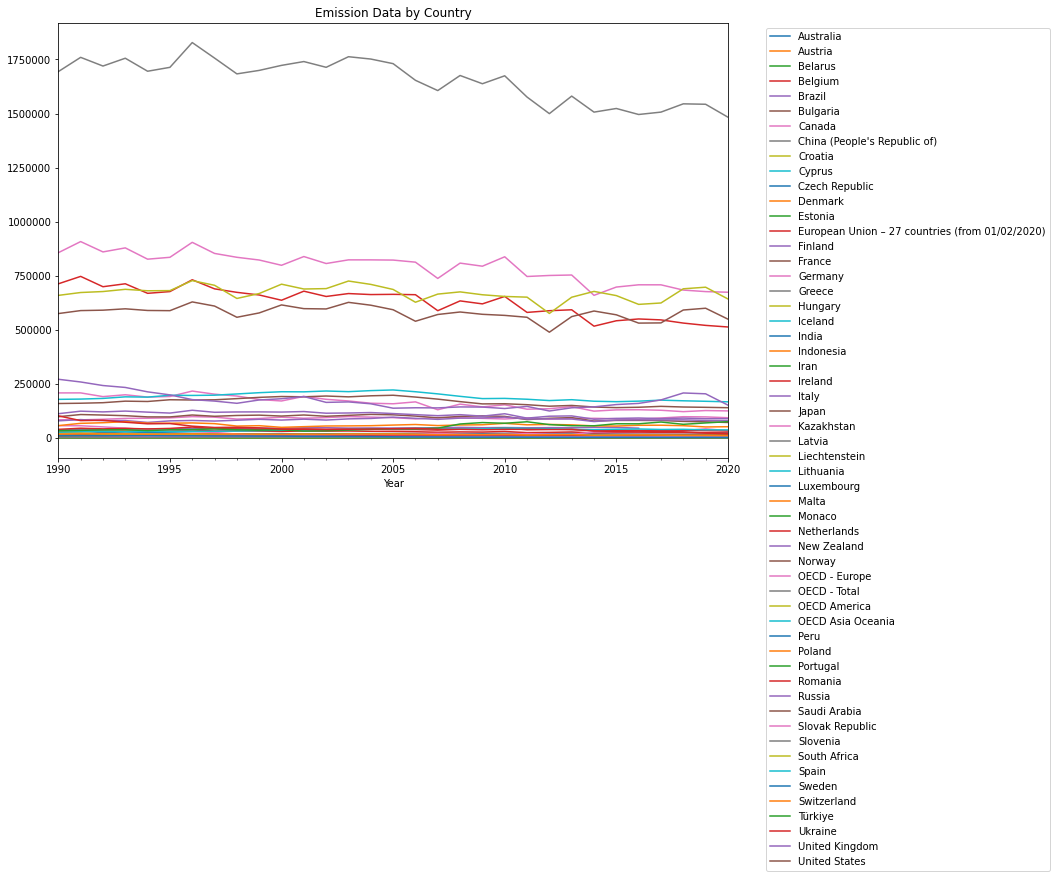

In [37]:
# for country in finaldf['Country'].unique():
#     temp_df = finaldf[finaldf['Country'] == country]
#     temp_df.plot(x='Year', y='Value')


fig, ax = plt.subplots(figsize=(12,8))
ax.set_xticks(finaldf['Year'].unique())
finaldf.groupby(["Year", "Country"]).mean()['Value'].unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Emission Data by Country")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

From this, we can see that there are 56 countries; each have data from 1990 - 2020 and that China is clearly the highest CO2e emitting country.

# Case Study I: Laws and how they relate to emissions

Let us randomly choose 4 countries and plot their data

In [38]:
# Australia
Ausdf = finaldf.loc[finaldf['Country'] =='Australia']
# India
Inddf = finaldf.loc[finaldf['Country'] =='India']
# United States
USdf = finaldf.loc[finaldf['Country'] =='United States']
# Denmark
Dendf = finaldf.loc[finaldf['Country'] =='Denmark']

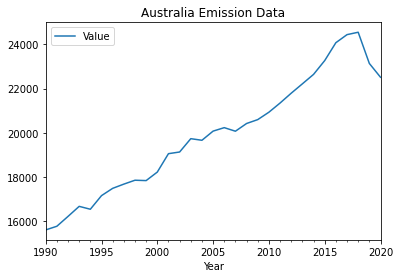

In [39]:
# Plotting initial data
Ausdf.plot(x="Year", y="Value")
plt.title("Australia Emission Data")
plt.show()

In [40]:
Ausdf['Country'].iloc[0]

'Australia'

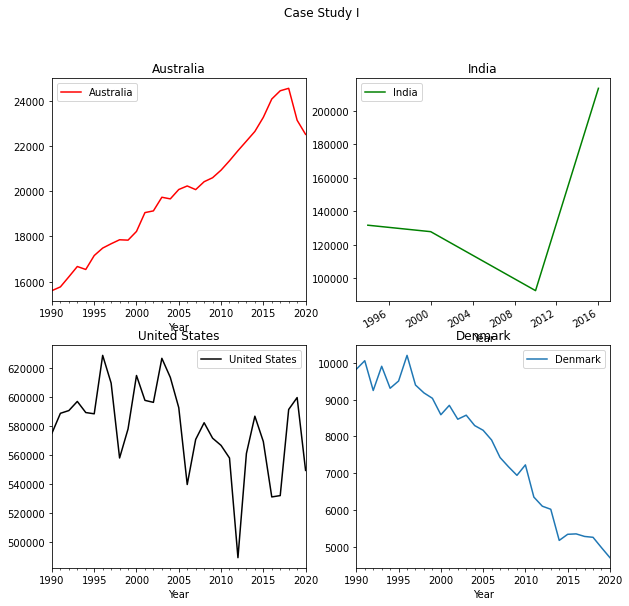

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10) )

Ausdf.plot(x="Year", y="Value", ax=axes[0,0], label=Ausdf['Country'].iloc[0], color='r')
axes[0,0].set_title(Ausdf['Country'].iloc[0])
Inddf.plot(x="Year", y="Value", ax=axes[0,1],  label=Inddf['Country'].iloc[0], color='g')
axes[0,1].set_title(Inddf['Country'].iloc[0])

USdf.plot(x="Year", y="Value", ax=axes[1,0],  label=USdf['Country'].iloc[0], color='black')
axes[1,0].set_title(USdf['Country'].iloc[0])

Dendf.plot(x="Year", y="Value", ax=axes[1,1],  label=Dendf['Country'].iloc[0])
axes[1,1].set_title(Dendf['Country'].iloc[0])

plt.suptitle('Case Study I')

plt.show()


How many rows of data do we have?

In [42]:
len(finaldf['Country'])

1542

It is important to know that 1542 rows spread across various countries is not large enough to make perfect CO2e predictions. However, the underlying goal of this project is to see whether we can get a baseline trend for the data and also check how climate laws have aligned with the current trend.

In [43]:
finaldf

,Country,Value,Year
15549,Netherlands,39535.126,1990-01-01
15550,Netherlands,44778.666,1991-01-01
15551,Netherlands,41897.131,1992-01-01
15552,Netherlands,44187.192,1993-01-01
15553,Netherlands,41552.684,1994-01-01
...,...,...,...
74296,European Union – 27 countries (from 01/02/2020),550028.390,2016-01-01
74297,European Union – 27 countries (from 01/02/2020),545720.670,2017-01-01
74298,European Union – 27 countries (from 01/02/2020),531003.870,2018-01-01
74299,European Union – 27 countries (from 01/02/2020),520334.190,2019-01-01


Predictions

In [44]:
labels = finaldf['Country'].unique()
print(labels)

['Netherlands' 'Norway' 'United Kingdom' 'Spain' 'Slovenia' 'Japan'
 'Greece' 'Finland' 'New Zealand' 'Lithuania' 'Denmark' 'Italy' 'Türkiye'
 'Hungary' 'Slovak Republic' 'Czech Republic' 'Ireland' 'Estonia'
 'Belgium' 'Russia' 'Latvia' 'Sweden' 'Canada' 'Portugal' 'Germany'
 'Luxembourg' 'Iceland' 'Australia' 'Austria' 'Poland' 'United States'
 'Switzerland' 'France' 'OECD - Europe' "China (People's Republic of)"
 'India' 'Indonesia' 'South Africa' 'OECD - Total' 'OECD Asia Oceania'
 'OECD America' 'Brazil' 'Malta' 'Croatia' 'Iran' 'Bulgaria' 'Monaco'
 'Ukraine' 'Liechtenstein' 'Cyprus' 'Peru' 'Belarus' 'Kazakhstan'
 'Saudi Arabia' 'Romania'
 'European Union – 27 countries (from 01/02/2020)']


In [45]:
years = finaldf['Year'].unique()
print(years)

['1990-01-01T00:00:00.000000000' '1991-01-01T00:00:00.000000000'
 '1992-01-01T00:00:00.000000000' '1993-01-01T00:00:00.000000000'
 '1994-01-01T00:00:00.000000000' '1995-01-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '1997-01-01T00:00:00.000000000'
 '1998-01-01T00:00:00.000000000' '1999-01-01T00:00:00.000000000'
 '2000-01-01T00:00:00.000000000' '2001-01-01T00:00:00.000000000'
 '2002-01-01T00:00:00.000000000' '2003-01-01T00:00:00.000000000'
 '2004-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '2006-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2010-01-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '2012-01-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000

# Case Study II: Countries most affected by Climate Change



In [46]:
# Japan
Japdf = finaldf.loc[finaldf['Country'] =='Japan']
# India
Inddf = finaldf.loc[finaldf['Country'] =='India']
# Canada
Candf = finaldf.loc[finaldf['Country'] =='Canada']
# South Africa- Madagascar Substitute
Rusdf = finaldf.loc[finaldf['Country'] =='Russia']

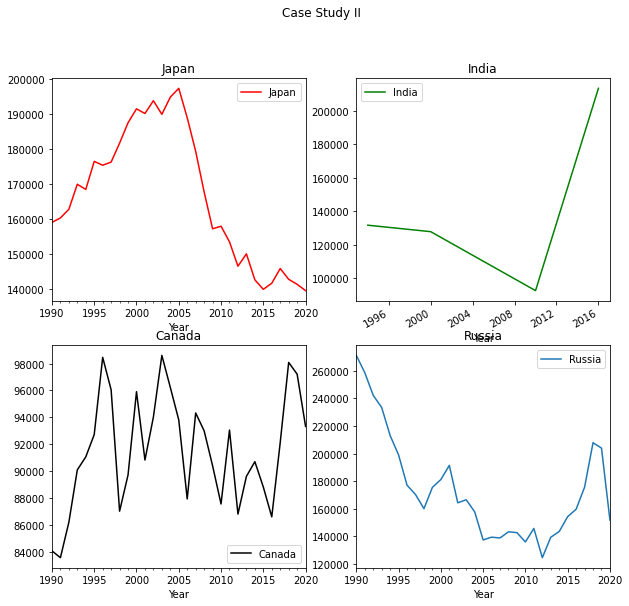

In [47]:
# Plotting initial data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

Japdf.plot(x="Year", y="Value", ax=axes[0,0], label=Japdf['Country'].iloc[0], color='r')
axes[0,0].set_title(Japdf['Country'].iloc[0])
Inddf.plot(x="Year", y="Value", ax=axes[0,1],  label=Inddf['Country'].iloc[0], color='g')
axes[0,1].set_title(Inddf['Country'].iloc[0])

Candf.plot(x="Year", y="Value", ax=axes[1,0],  label=Candf['Country'].iloc[0], color='black')
axes[1,0].set_title(Candf['Country'].iloc[0])

Rusdf.plot(x="Year", y="Value", ax=axes[1,1],  label=Rusdf['Country'].iloc[0])
axes[1,1].set_title(Rusdf['Country'].iloc[0])

plt.suptitle('Case Study II')

plt.show()


# Case Study III: Four countries resilient to climate change using ND-GAIN Country Index

The ND-GAIN Country Index summarizes a country's vulnerability to climate change and other global challenges in combination with its readiness to improve resilience. It aims to help governments, businesses and communities better prioritize investments for a more efficient response to the immediate global challenges ahead [source](https://gain.nd.edu/our-work/country-index/rankings/).

In [48]:
# Norway
Nordf = finaldf.loc[finaldf['Country'] =='Norway']
# Finland
Findf = finaldf.loc[finaldf['Country'] =='Finland']
# Switzerland
Swidf = finaldf.loc[finaldf['Country'] =='Switzerland']
# Sweden
Swedf = finaldf.loc[finaldf['Country'] =='Sweden']

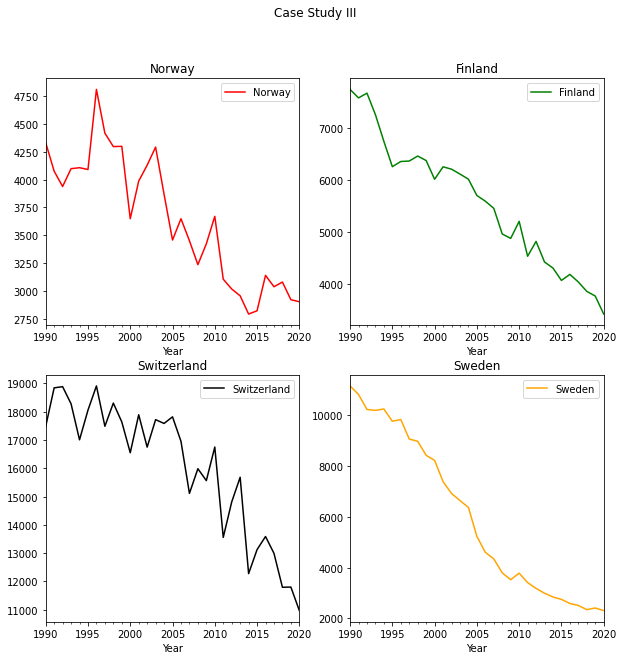

In [49]:
# Plotting initial data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

Nordf.plot(x="Year", y="Value", ax=axes[0,0], label=Nordf['Country'].iloc[0], color='r')
axes[0,0].set_title(Nordf['Country'].iloc[0])
Findf.plot(x="Year", y="Value", ax=axes[0,1],  label=Findf['Country'].iloc[0], color='g')
axes[0,1].set_title(Findf['Country'].iloc[0])

Swidf.plot(x="Year", y="Value", ax=axes[1,0],  label=Swidf['Country'].iloc[0], color='black')
axes[1,0].set_title(Swidf['Country'].iloc[0])

Swedf.plot(x="Year", y="Value", ax=axes[1,1],  label=Swedf['Country'].iloc[0], color='orange')
axes[1,1].set_title(Swedf['Country'].iloc[0])

plt.suptitle('Case Study III')

plt.show()


# Case Study IV: Four countries with most changed values

In [50]:
def mostChanged(countrylist):
  changeVals = []
  for country in countrylist:
    countrydf = finaldf.loc[finaldf['Country'] ==country]
    diff = (countrydf['Value'].iat[0] - countrydf['Value'].iat[-1])/countrydf['Value'].iat[0]
    changeVals.append((country,diff))
  return changeVals

In [51]:
x = mostChanged(labels)
x.sort(key=lambda a: a[1])
x

[('Saudi Arabia', -24.104318484893387),
 ('Türkiye', -1.2321014117336355),
 ('South Africa', -0.6446235943295242),
 ('India', -0.6228183531987351),
 ('Australia', -0.44290450861237746),
 ("China (People's Republic of)", -0.4413057590235334),
 ('Spain', -0.40844801424187593),
 ('Indonesia', -0.3805480488458607),
 ('New Zealand', -0.3082907628919339),
 ('Iran', -0.21525811633500783),
 ('Brazil', -0.21104271131205218),
 ('Luxembourg', -0.18932218021173866),
 ('Cyprus', -0.17490572300543078),
 ('Canada', -0.11024646832415112),
 ('Portugal', -0.10327204830671573),
 ('Romania', -0.06638596630023934),
 ('Italy', -0.0032272107092768602),
 ('OECD America', 0.025034975221459158),
 ('United States', 0.04481131267409813),
 ('Belarus', 0.0621043188858854),
 ('OECD Asia Oceania', 0.064047697838902),
 ('Ireland', 0.08115740931713175),
 ('Poland', 0.0904590026807304),
 ('Japan', 0.12213768544331963),
 ('OECD - Total', 0.12439880924968796),
 ('Netherlands', 0.19522914888395693),
 ('Belgium', 0.19931333

In [52]:
# Ukraine
Ukrdf = finaldf.loc[finaldf['Country'] =='Ukraine']
# Lithuania
Lithdf = finaldf.loc[finaldf['Country'] =='Lithuania']
# Sweden
Swedf = finaldf.loc[finaldf['Country'] =='Sweden']
# Bulgaria
Bulgdf = finaldf.loc[finaldf['Country'] =='Bulgaria']

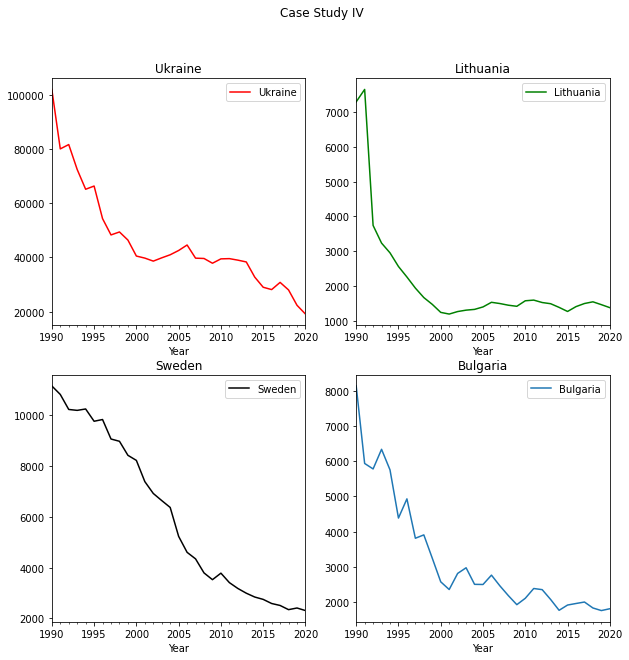

In [53]:
# Plotting initial data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

Ukrdf.plot(x="Year", y="Value", ax=axes[0,0], label=Ukrdf['Country'].iloc[0], color='r')
axes[0,0].set_title(Ukrdf['Country'].iloc[0])
Lithdf.plot(x="Year", y="Value", ax=axes[0,1],  label=Lithdf['Country'].iloc[0], color='g')
axes[0,1].set_title(Lithdf['Country'].iloc[0])

Swedf.plot(x="Year", y="Value", ax=axes[1,0],  label=Swedf['Country'].iloc[0], color='black')
axes[1,0].set_title(Swedf['Country'].iloc[0])

Bulgdf.plot(x="Year", y="Value", ax=axes[1,1],  label=Bulgdf['Country'].iloc[0])
axes[1,1].set_title(Bulgdf['Country'].iloc[0])

plt.suptitle('Case Study IV')

plt.show()

# ax = Ukrdf.plot(x="Year", y="Value")

# Lithdf.plot(ax=ax,x="Year", y="Value")
# Swedf.plot(ax=ax,x="Year", y="Value")
# Bulgdf.plot(ax=ax,x="Year", y="Value")

# Predicting co2e emissions for all countries in the future

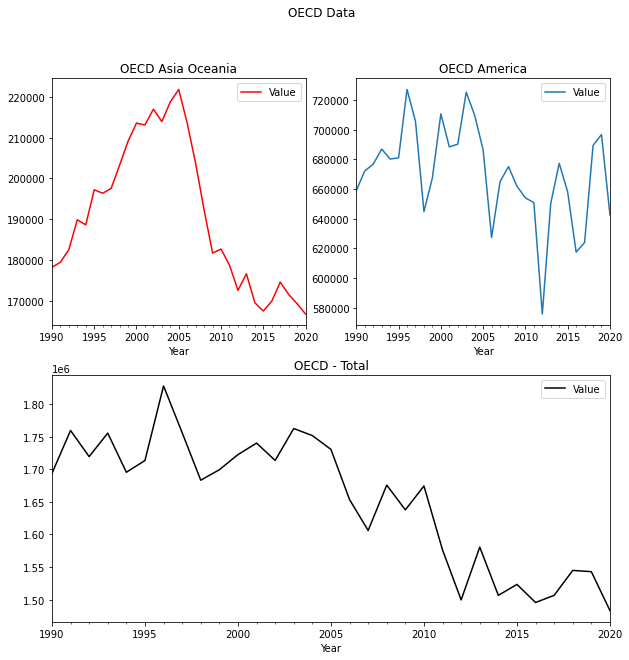

In [54]:
fig = plt.figure(figsize=(10, 10))

OECDdf = finaldf.loc[finaldf['Country'] =='OECD - Total']
OECDAOdf = finaldf.loc[finaldf['Country'] =='OECD Asia Oceania']
OECDAmdf = finaldf.loc[finaldf['Country'] =='OECD America']

gs = gridspec.GridSpec(2,2)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])

OECDAOdf.plot(x="Year", y="Value",ax = ax1, title='OECD Asia Oceania', color='red')
OECDAmdf.plot(x="Year", y="Value", ax = ax2, title='OECD America') 
OECDdf.plot(x="Year", y="Value", ax = ax3, title='OECD - Total', color='black')
plt.suptitle('OECD Data')
plt.show()

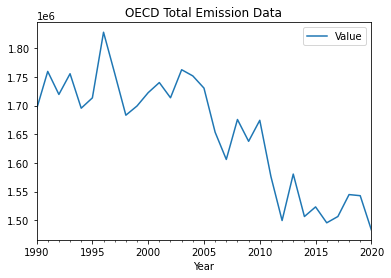

In [55]:
# OECD

OECDdf = finaldf.loc[finaldf['Country'] =='OECD - Total']
OECDdf.plot(x="Year", y="Value")
plt.title("OECD Total Emission Data")
plt.show()

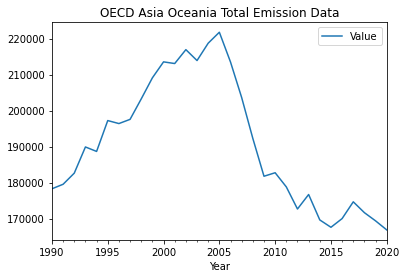

In [56]:
# OECD Asia Oceania
OECDAOdf = finaldf.loc[finaldf['Country'] =='OECD Asia Oceania']
OECDAOdf.plot(x="Year", y="Value")
plt.title("OECD Asia Oceania Total Emission Data")
plt.show()

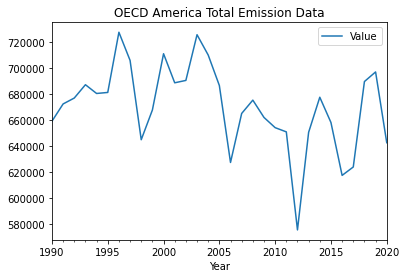

In [57]:
# OECD America
OECDAmdf = finaldf.loc[finaldf['Country'] =='OECD America']
OECDAmdf.plot(x="Year", y="Value")
plt.title("OECD America Total Emission Data")
plt.show()

In [58]:
Austs = pd.DataFrame(Ausdf[['Year','Value']])

<AxesSubplot: title={'center': 'Australia Year by Year Emission Data 1990-2020'}, xlabel='Year'>

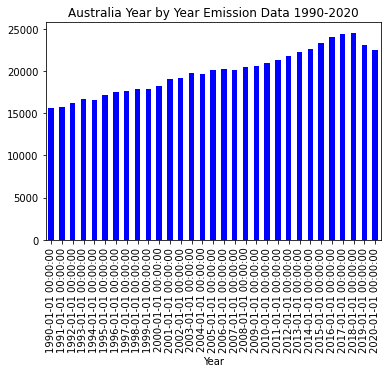

In [59]:
# Basic exploratory analysis
Austs.groupby('Year').Value.mean().plot.bar(title='Australia Year by Year Emission Data 1990-2020', color='blue')

In [60]:
OECDdf[['Country']]

,Country
36397,OECD - Total
36398,OECD - Total
36399,OECD - Total
36400,OECD - Total
36401,OECD - Total
36402,OECD - Total
36403,OECD - Total
36404,OECD - Total
36405,OECD - Total
36406,OECD - Total


Australia: We see a clear upward trend of emission values until 2018 and then a decrease to 2020. The graph above is not stationary because the mean increases over time.

In [61]:
Austs['Year'].describe()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-61-70b6ce0e3ee5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Austs['Year'].describe()

  Austs['Year'].describe()



count                      31
unique                     31
top       1990-01-01 00:00:00
freq                        1
first     1990-01-01 00:00:00
last      2020-01-01 00:00:00
Name: Year, dtype: object

## Implementing Neural Prophet

In [62]:
# Forecasting the emmisions into the future
# Using https://neuralprophet.com/code/forecaster.html#neuralprophet.forecaster.NeuralProphet.make_future_dataframe
def plotForcast(co2eDF, frequency, yearstopredict, country):
  l = co2eDF.plot(x="Year", y="Value", title=country+" Total Emission Data till 2020",ylabel="CO2e (Thousand Tonnes)",figsize=(11, 9))
  ts = co2eDF.rename(columns={'Year': 'ds', 'Value': 'y'})
  ts = ts.drop('Country',axis=1)


  m = NeuralProphet()

  metrics = m.fit(ts, freq=frequency ) #The freq='Y' denotes that we’re using a yearly frequency.
  future = m.make_future_dataframe(ts, periods=yearstopredict) # Extending Dataframe a number of periods (years) in the future

  forecast = m.predict(future)
  print()
  print()
  print('Prediction DataFrame')
  print(forecast.tail()) #List last 5 rows of forcast


  mplot = m.plot(forecast)
  
  
  mplot.suptitle(country+"'s CO2e Prediction for the next "+ str(yearstopredict) + " years using NeuralProphet")


  return forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=

Finding best initial lr:   0%|          | 0/202 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency 

Predicting: 2it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.




Prediction DataFrame
          ds     y         yhat1         trend  season_yearly
0 2021-01-01  None  24612.267578  26913.501953   -2301.234131
1 2022-01-01  None  24710.460938  27162.757812   -2452.297363
2 2023-01-01  None  24806.425781  27412.015625   -2605.590576
3 2024-01-01  None  24900.218750  27661.273438   -2761.054932
4 2025-01-01  None  25609.980469  27911.214844   -2301.234131


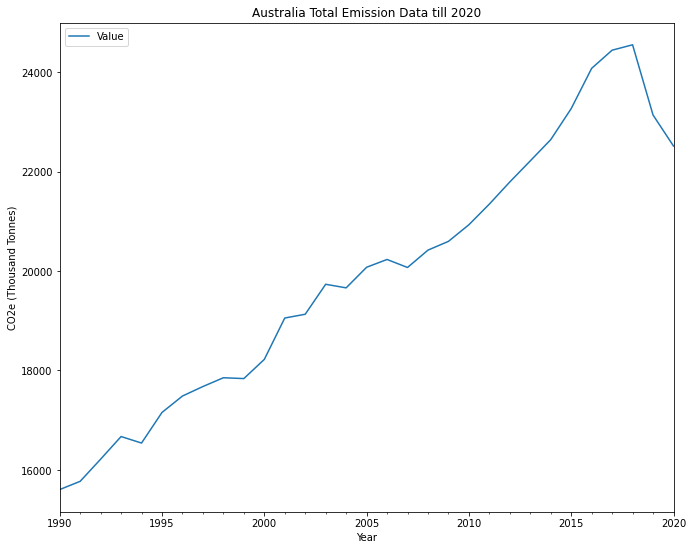

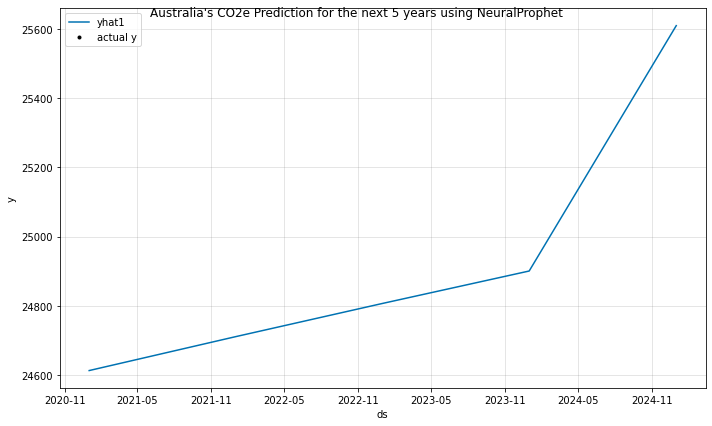

In [63]:
AusForcast = plotForcast(co2eDF=Ausdf, frequency='Y', yearstopredict=5, country="Australia")

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=

Finding best initial lr:   0%|          | 0/202 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency 

Predicting: 2it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.




Prediction DataFrame
          ds     y          yhat1         trend  season_yearly
0 2021-01-01  None  140131.921875  31620.781250  108511.140625
1 2022-01-01  None  138837.203125  30767.234375  108069.968750
2 2023-01-01  None  137529.968750  29913.679688  107616.289062
3 2024-01-01  None  136210.390625  29060.132812  107150.257812
4 2025-01-01  None  136715.375000  28204.234375  108511.140625


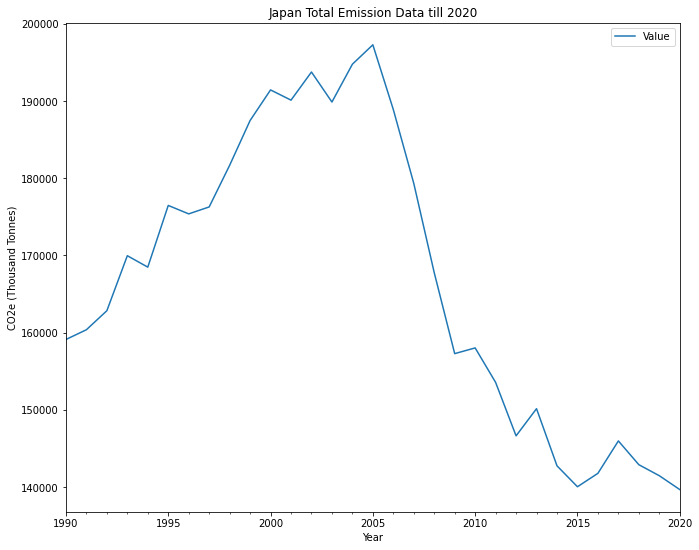

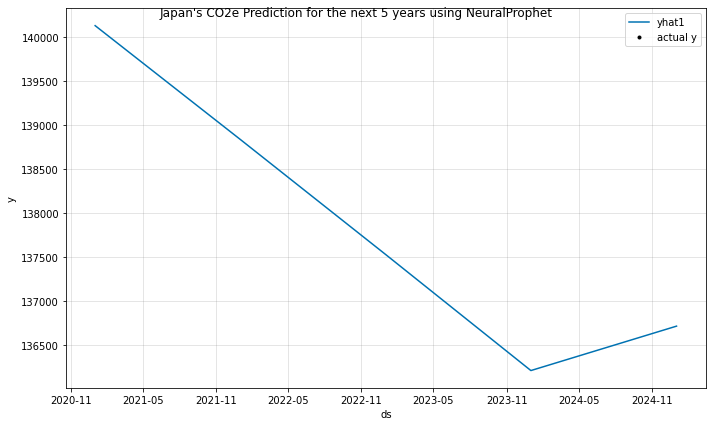

In [64]:
JapForcast = plotForcast(co2eDF=Japdf, frequency='Y', yearstopredict=5, country="Japan")

In [65]:
def plotAllEmissions(country, dataDF, predictionDF):
  fig, ax = plt.subplots()

  predictionDF= predictionDF.rename({'ds':'Year','yhat1':'Value'},axis='columns')
  ax = dataDF.plot(x="Year", y="Value",title='Prediction Plot of ' + country + ' (1990 - 2025) using Neural Prophet', ylabel='CO2e Thousand Tonnes', xlabel='Year')
  predictionDF.plot(x="Year", y="Value", ax=ax, figsize=(12,8))
  ax.legend(["Actual Value", "Prediction"])


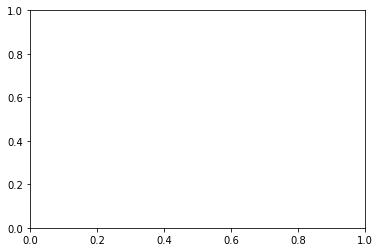

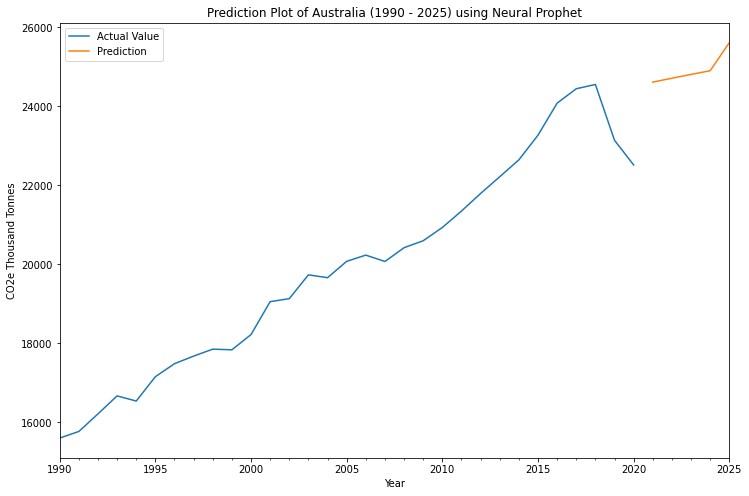

In [66]:
plotAllEmissions('Australia', Ausdf, AusForcast)

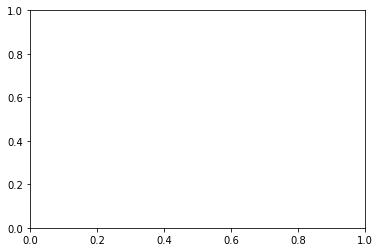

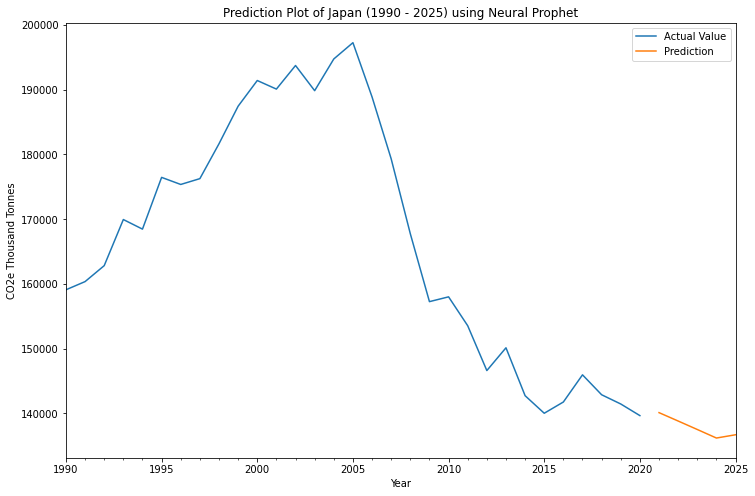

In [67]:
plotAllEmissions('Japan', Japdf, JapForcast)

## Implementing Predictions using PyAF

In [68]:
def predStats(testsetPrctge, dataDF, country):
  dataDF = dataDF.rename(columns={'Year': 'ds', 'Value': 'y'})
  dataDF = dataDF.drop('Country',axis=1)

  testsetSize = math.floor(len(dataDF)*testsetPrctge)

  Y_train_df = dataDF[:-testsetSize]
  Y_test_df = dataDF[-testsetSize:]
  horizon = len(Y_test_df)

  #set up the model engine
  lEngine = autof.cForecastEngine()
  
  # get the best time series model for test prediction
  print('Engine Set Up!')
  print('Training...')
  lEngine.train(iInputDS = Y_train_df, iTime = 'ds', iSignal = 'y', iHorizon = horizon)
  print('Training Done!')

  forecast_df= lEngine.forecast(Y_train_df, horizon)
  forecast_df.plot.line('ds', ['y' , 'y_Forecast','y_Forecast_Lower_Bound', 'y_Forecast_Upper_Bound'], grid = True, figsize=(12, 8), xlabel='CO2e (Thousand Tonnes)', ylabel='Year', title=country+" Forcast for 2025 using PyAF")
  return forecast_df

Engine Set Up!
Training...
Training Done!


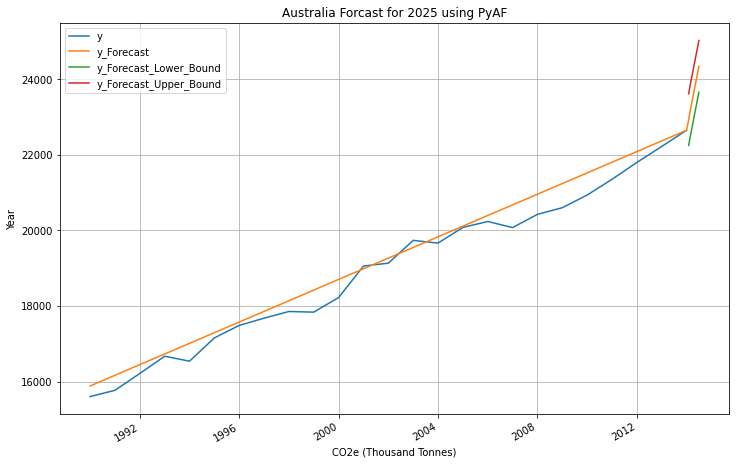

In [69]:
AusStats = predStats(testsetPrctge=0.2, dataDF=Ausdf, country='Australia')

Engine Set Up!
Training...
Training Done!


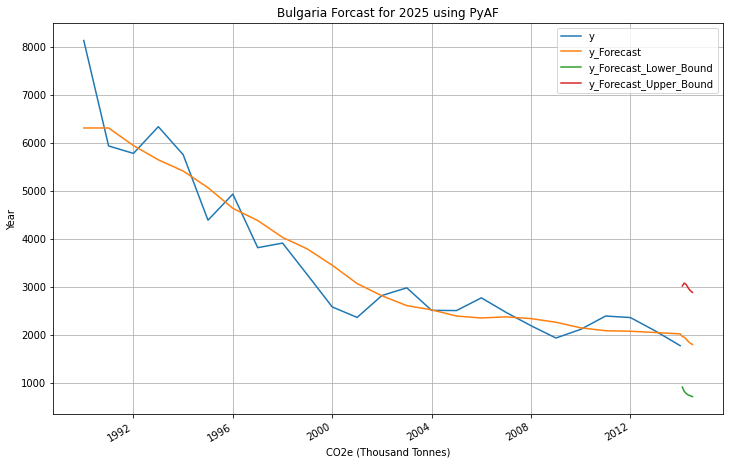

In [70]:
BulgStats = predStats(testsetPrctge=0.2, dataDF=Bulgdf, country='Bulgaria') 

Engine Set Up!
Training...
Training Done!


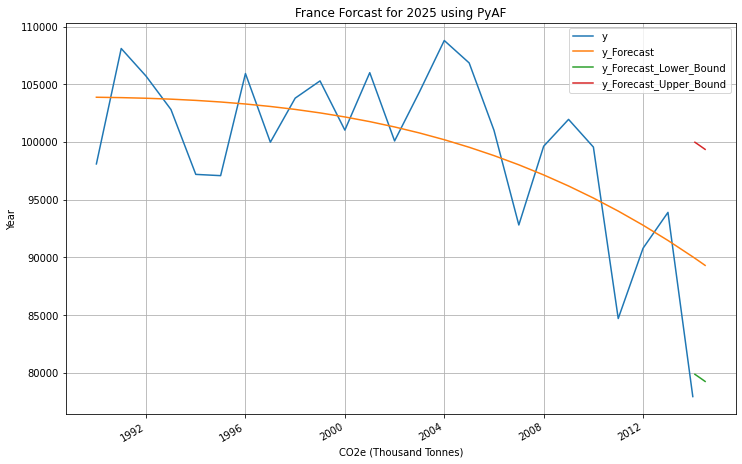

In [71]:
FraStats = predStats(testsetPrctge=0.2, dataDF=fraDF, country='France') 

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=

Finding best initial lr:   0%|          | 0/202 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency 

Predicting: 2it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.




Prediction DataFrame
          ds     y        yhat1        trend  season_yearly
0 2021-01-01  None  1496614.125  1484578.125   12035.985352
1 2022-01-01  None  1485255.125  1477081.250    8173.851562
2 2023-01-01  None  1473828.125  1469584.500    4243.645020
3 2024-01-01  None  1462335.000  1462087.625     247.312012
4 2025-01-01  None  1466606.250  1454570.250   12035.985352


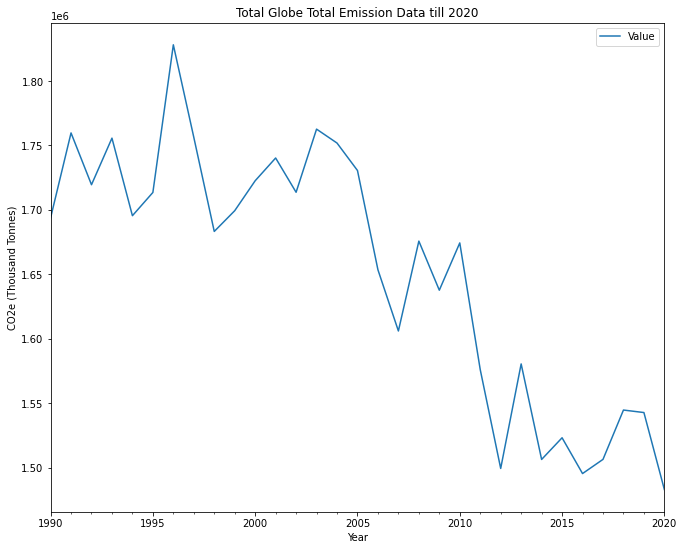

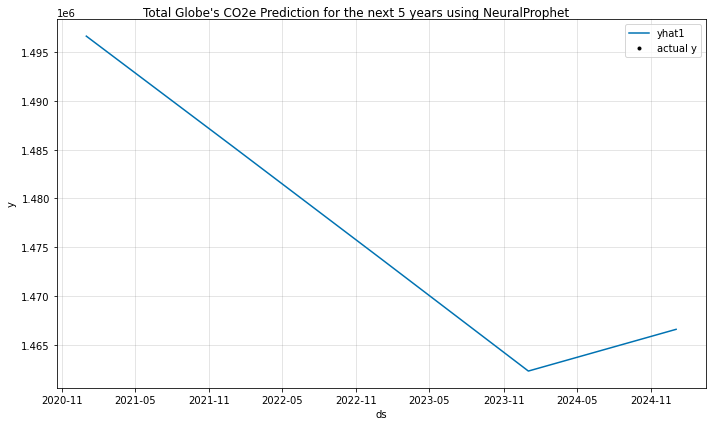

In [72]:
OECDforcast = plotForcast(co2eDF=OECDdf, frequency='Y', yearstopredict=5, country="Total Globe")

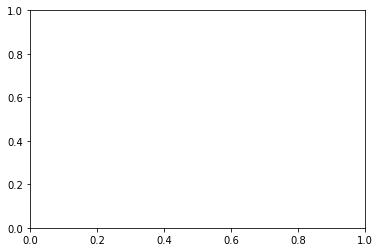

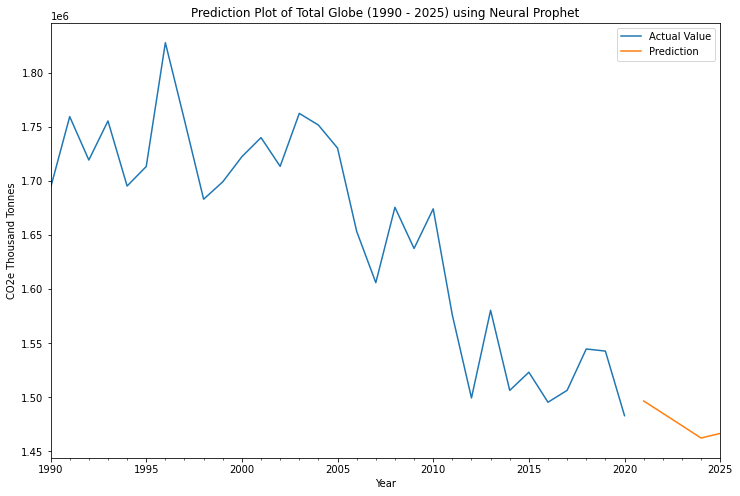

In [73]:
plotAllEmissions('Total Globe', OECDdf, OECDforcast)

For ARIMA models to work, we have to make the data stationary. We remove the trends and seasonality. This will make it easier for ARIMA to make a prediction. To make a time series stationary, we apply the differencing technique.

Augmented Dickey-Fuller test
We will implement the Augmented Dickey-Fuller (ADF) test to check for stationarity. The ADF test uses hypothesis testing to check for stationarity. It has a null hypothesis and an alternative hypothesis. The null hypothesis of this test is that the times series is non-stationary. The alternative hypothesis is that the time series is stationary.

The ADF test has an important parameter known as the p-value that determines whether a time series is stationary. The time series is stationary when the p-value is less than 0.05.

In [74]:
from statsmodels.tsa.stattools import adfuller

def adf_test(sales):
    result=adfuller(sales)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

## Making stationary

In [75]:
adf_test(Ausdf['Value'])

Test parameters : -1.5333933540071796
p-value : 0.516932234771288
#Lags Used : 1
Dataset observations : 29
Dataset is non-stationary 


From the output above, we have different output values that show the nature of our dataset. We are only interested in the p-value result. The p-value is 0.363915771660247.

This number is greater than 0.05. It implies that the time series is non-stationary. We will have to make the time series stationary using the differencing approach.

### Implementing differencing
This approach finds the difference between the current monthly values and the previous monthly values in the time series. We will difference only once, therefore our d=1.

In [76]:
Ausdf = finaldf.loc[finaldf['Country'] =='Australia']

In [77]:
Ausdf['Value']

20721    15604.402
20722    15770.105
20723    16215.672
20724    16671.072
20725    16540.265
20726    17156.228
20727    17486.125
20728    17677.445
20729    17853.945
20730    17837.279
20731    18222.848
20732    19055.644
20733    19131.493
20734    19734.660
20735    19662.458
20736    20076.927
20737    20233.668
20738    20072.445
20739    20421.838
20740    20597.825
20741    20932.778
20742    21348.121
20743    21793.538
20744    22217.394
20745    22644.518
20746    23269.182
20747    24079.213
20748    24444.269
20749    24552.731
20750    23140.070
20751    22515.662
Name: Value, dtype: float64

In [78]:
Ausdf['Log']=np.sqrt(Ausdf['Value'])
Ausdf['Diff']=Ausdf['Log'].diff().dropna()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-78-8075ec1924bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ausdf['Log']=np.sqrt(Ausdf['Value'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ausdf['Log']=np.sqrt(Ausdf['Value'])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-78-8075ec1924bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [79]:
adf_test(Ausdf['Diff'].dropna())

Test parameters : -3.111295585236218
p-value : 0.025728479451821395
#Lags Used : 6
Dataset observations : 23
Dataset is stationary


In [80]:
Ausdf['Diff']

20721         NaN
20722    0.661498
20723    1.761692
20724    1.775734
20725   -0.507544
20726    2.372823
20727    1.253328
20728    0.721440
20729    0.662102
20730   -0.062379
20731    1.435753
20732    3.050153
20733    0.274458
20734    2.163465
20735   -0.257218
20736    1.470186
20737    0.552025
20738   -0.567842
20739    1.227740
20740    0.614427
20741    1.162220
20742    1.428318
20743    1.516384
20744    1.428657
20745    1.425952
20746    2.061439
20747    2.632388
20748    1.171849
20749    0.346480
20750   -4.574506
20751   -2.066407
Name: Diff, dtype: float64

<AxesSubplot: >

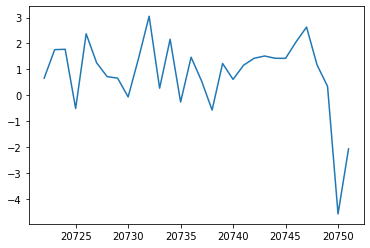

In [81]:
Ausdf['Diff'].plot()

## Implementing ARIMA model

As mentioned earlier, we initialize the ARIMA model as ARIMA (p,d,q). So we need to get the values of these parameters. We have already discussed the function of each parameter.

We already know the d=1. It is because we have performed differencing only once. The next step is to get the best p and q values.

Getting the best ‘p’ and ‘q’ values
We get the best value of q using an Autocorrelation Function (ACF) plot.

We get the best value of p using a Partial Autocorrelation Function (PACF) plot.

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Ausdf['Diff'].iloc[13:],lags=17,ax=ax1)

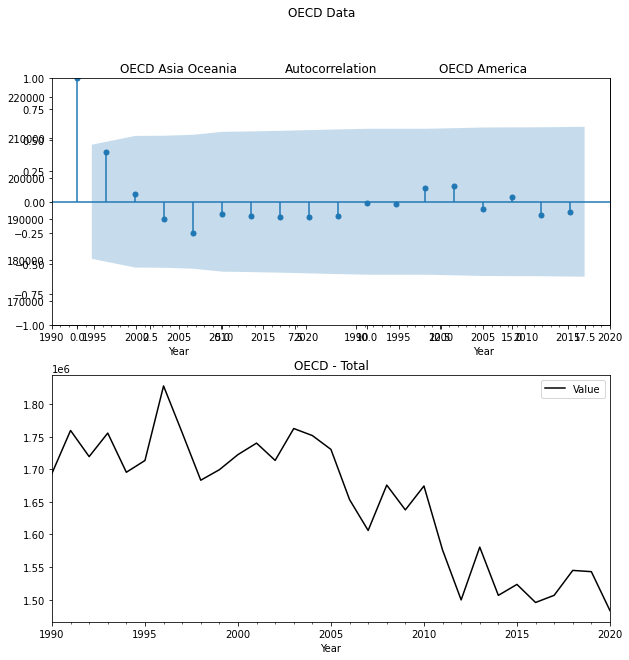

In [83]:
fig

We will use this plot to get the best value of q. From the ACF plot, lag number one stands out. The red arrow shows the lag point. It is slightly under (cuts off) the significance line (the blue line). We will select this lag as the best value of q. Therefore, q=1.

plotting pacf

In [84]:
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Ausdf['Diff'].iloc[13:],lags=8,ax=ax2)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(

  warnings.warn(



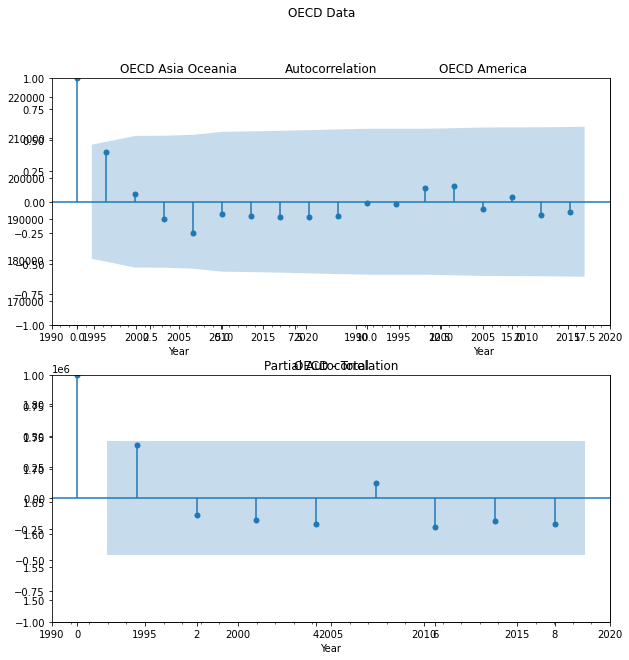

In [85]:
fig

We will use this plot to get the best value of p. From the PACF plot, we can observe that lags 1 and 13 stand out. The red arrow shows the lag points.

These points are above (cuts off) the significance line (the blue shaded line). We select lag number one as the best value of p. It is the first lag that is above the blue line. Therefore, p=1.

Our values will be: p=1, d=1 and q=1. The next step is to import the ARIMA model.

In [86]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(Ausdf['Value'],order=(1,1,1))

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)



Training the ARIMA model
We use fit function to train the ARIMA model. The ARIMA model will learn from the time series dataset.



In [87]:
arima_model=model.fit()


We have trained the ARIMA model. We can use it to predict the test dataset. The prediction will show the actual monthly sales and the predicted (forecast) sales.

### Testing the ARIMA model using the test dataset
We will use the values from the 90th row to the 103rd row as the test portion/set. We will then use Matplotlib to show the actual and the predicted (forecast) monthly sales.

In [88]:
len(Ausdf['Value'])

31

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

  return get_prediction_index(

WARNING - (py.warnings._showwarnmsg) - <ipython-input-89-336c53e6130a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ausdf['forecast']=arima_model.predict(start=26,end=31,dynamic=True)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<AxesSubplot: >

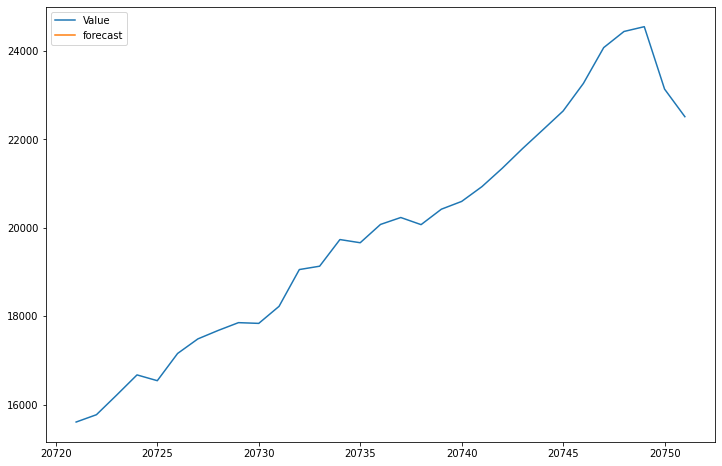

In [89]:
Ausdf['forecast']=arima_model.predict(start=26,end=31,dynamic=True)
Ausdf[['Value','forecast']].plot(figsize=(12,8))

TODO: predict weather

In [90]:
Ausdf

,Country,Value,Year,Log,Diff,forecast
20721,Australia,15604.402,1990-01-01,124.917581,NaN,NaN
20722,Australia,15770.105,1991-01-01,125.579079,0.661498,NaN
20723,Australia,16215.672,1992-01-01,127.340771,1.761692,NaN
20724,Australia,16671.072,1993-01-01,129.116506,1.775734,NaN
20725,Australia,16540.265,1994-01-01,128.608962,-0.507544,NaN
20726,Australia,17156.228,1995-01-01,130.981785,2.372823,NaN
20727,Australia,17486.125,1996-01-01,132.235113,1.253328,NaN
20728,Australia,17677.445,1997-01-01,132.956553,0.721440,NaN
20729,Australia,17853.945,1998-01-01,133.618655,0.662102,NaN
20730,Australia,17837.279,1999-01-01,133.556277,-0.062379,NaN


In [91]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
df = Ukrdf
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "Year", "Value")

# Set aside the last 36 months as a validation series
train, val = series[:-6], series[-6:]

In [93]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import SeasonalityMode

model = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(

  warnings.warn(



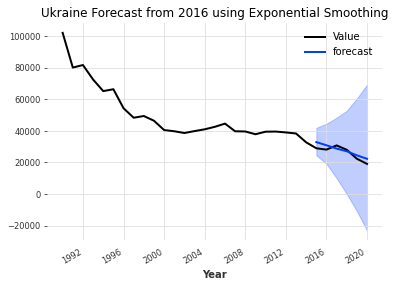

In [94]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.title('Ukraine Forecast from 2016 using Exponential Smoothing')
plt.show()

Attempting to Create More Data

In [95]:
Bulgdf

,Country,Value,Year
61491,Bulgaria,8132.721,1990-01-01
61492,Bulgaria,5934.927,1991-01-01
61493,Bulgaria,5779.482,1992-01-01
61494,Bulgaria,6336.295,1993-01-01
61495,Bulgaria,5752.889,1994-01-01
61496,Bulgaria,4386.960,1995-01-01
61497,Bulgaria,4931.234,1996-01-01
61498,Bulgaria,3814.570,1997-01-01
61499,Bulgaria,3909.664,1998-01-01
61500,Bulgaria,3248.901,1999-01-01


In [96]:
!pip install gretel_synthetics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Arima Model for OECD Total DataFrame

In [97]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(OECDdf['Value'],order=(1,1,1))

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)



Training the ARIMA model
We use fit function to train the ARIMA model. The ARIMA model will learn from the time series dataset.



In [98]:
arima_model=model.fit()


We have trained the ARIMA model. We can use it to predict the test dataset. The prediction will show the actual monthly sales and the predicted (forecast) sales.

## Testing the ARIMA model using the test dataset
We will use the values from the 90th row to the 103rd row as the test portion/set. We will then use Matplotlib to show the actual and the predicted (forecast) monthly sales.

In [99]:
OECDdf['Value']

36397    1693722.0
36398    1759636.0
36399    1719466.0
36400    1755592.0
36401    1695438.0
36402    1713460.0
36403    1827990.0
36404    1756258.0
36405    1683218.0
36406    1699303.0
36407    1722540.0
36408    1740188.0
36409    1713615.0
36410    1762580.0
36411    1751789.0
36412    1730496.0
36413    1653483.0
36414    1606022.0
36415    1675726.0
36416    1637660.0
36417    1674327.0
36418    1576063.0
36419    1499402.0
36420    1580471.0
36421    1506384.0
36422    1523197.0
36423    1495438.0
36424    1506435.0
36425    1544698.0
36426    1542758.0
36427    1483025.0
Name: Value, dtype: float64

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

  return get_prediction_index(

WARNING - (py.warnings._showwarnmsg) - <ipython-input-100-785e41bbfefc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OECDdf['forecast']=arima_model.predict(start=6,end=31,dynamic=True)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

<AxesSubplot: >

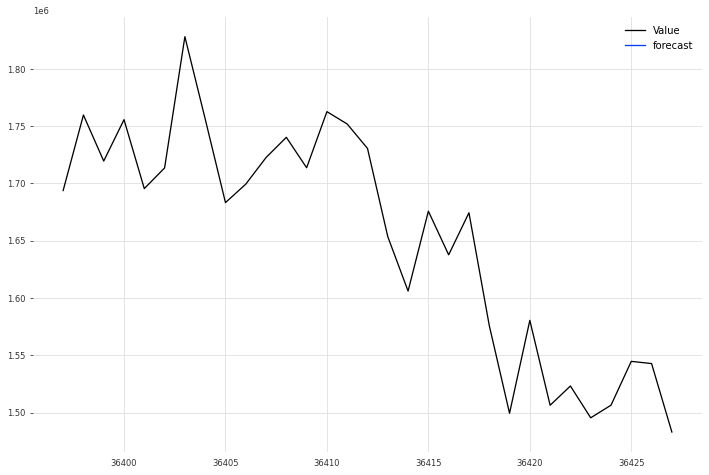

In [100]:
OECDdf['forecast']=arima_model.predict(start=6,end=31,dynamic=True)
OECDdf[['Value','forecast']].plot(figsize=(12,8))

In [102]:

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(OECDdf['Value'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)



                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -368.456
Date:                Fri, 16 Dec 2022   AIC                            742.913
Time:                        04:12:43   BIC                            747.116
Sample:                             0   HQIC                           744.258
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6305      0.616     -1.023      0.306      -1.838       0.577
ma.L1          0.6714      0.507      1.325      0.185      -0.322       1.665
sigma2      2.675e+09   2.85e-10   9.38e+18      0.0

In [104]:
model = ARIMA(OECDdf['Value'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)



                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -368.456
Date:                Fri, 16 Dec 2022   AIC                            742.913
Time:                        04:12:51   BIC                            747.116
Sample:                             0   HQIC                           744.258
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6305      0.616     -1.023      0.306      -1.838       0.577
ma.L1          0.6714      0.507      1.325      0.185      -0.322       1.665
sigma2      2.675e+09   2.85e-10   9.38e+18      0.0

In [105]:
len(finaldf)

1542

In [107]:
model = ARIMA(OECDdf['Value'], order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)



                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   31
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -381.731
Date:                Fri, 16 Dec 2022   AIC                            769.462
Time:                        04:13:00   BIC                            773.764
Sample:                             0   HQIC                           770.864
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.653e+06   6.54e+04     25.288      0.000    1.52e+06    1.78e+06
ar.L1          0.8557      0.116      7.395      0.000       0.629       1.082
sigma2      2.854e+09   9.04e-05   3.16e+13      0.0

In [108]:
OECDdf['Log']=np.sqrt(OECDdf['Value'])
OECDdf['Diff']=OECDdf['Log'].diff().dropna()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-108-d96e1d33e134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OECDdf['Log']=np.sqrt(OECDdf['Value'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OECDdf['Log']=np.sqrt(OECDdf['Value'])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-108-d96e1d33e134>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [110]:
model = ARIMA(OECDdf['Diff'].dropna(), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)



                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -130.616
Date:                Fri, 16 Dec 2022   AIC                            267.233
Time:                        04:13:07   BIC                            271.335
Sample:                             0   HQIC                           268.518
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2716      0.204     -1.331      0.183      -0.671       0.128
ma.L1         -0.9986      7.027     -0.142      0.887     -14.772      12.775
sigma2       418.0366   2918.543      0.143      0.8

## Implementing Exponential Smoothing

In [111]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
df = Rusdf
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "Year", "Value")

# Set aside the last 36 months as a validation series
train, val = series[:-6], series[-6:]

In [112]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import SeasonalityMode

model = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
model.fit(train)
prediction = model.predict(len(val), num_samples=7000)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(

  warnings.warn(



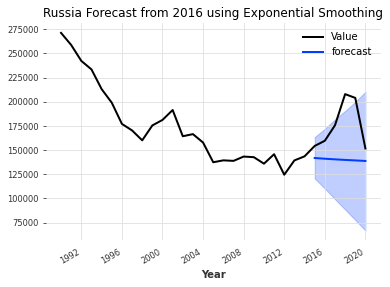

In [113]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.title('Russia Forecast from 2016 using Exponential Smoothing')
plt.show()

Ideas for Data Augmentation:

-    https://github.com/DrSasanBarak/AugmentTS

- https://github.com/e-delaney/Univariate-Sales-Forecasting-Walmart-/blob/master/Univariate%20Retail%20Sales/Prophet%20Forecast%20%26%20Data%20Augmentation%20with%20NN.ipynb

Incomplete attempt at Data Augmentation

In [114]:
# Current data
print(df.head())
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig

# Train the model

attributes = np.random.rand(10000, 3)
features = np.random.rand(10000, 20, 2)

config = DGANConfig(
    max_sequence_len=20,
    sample_len=5,
    batch_size=1000,
    epochs=10
)
model = DGAN(config)

model.train_dataframe(df, attributes, features)

synthetic_attributes, synthetic_features = model.generate(1000)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:1058: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  c for c in df.columns if c in attribute_columns or c in feature_columns

  c for c in df.columns if c in attribute_columns or c in feature_columns



      Country       Value       Year
19605  Russia  271165.662 1990-01-01
19606  Russia  258663.282 1991-01-01
19607  Russia  242186.804 1992-01-01
19608  Russia  233381.870 1993-01-01
19609  Russia  213027.740 1994-01-01


TypeError: ignored

Not Shown: Semantic Analysis Attempts using BERT (Not on COLAB)